# Regressão Polinomial

Este notebook implementa um modelo de regressão polinomial para prever preços de imóveis
a partir do conjunto de dados do Kaggle 'House Prices - Advanced Regression Techniques'.
A regressão polinomial é uma extensão da regressão linear que permite modelar relações não lineares
entre as variáveis independentes e a variável dependente.

### 1. Importações e configurações necessárias

In [33]:
## 1. Importações e Configurações Iniciais

# Importações necessárias
import os # Importação de arquivos
import numpy as np # Tratamento de dados numéricos
import pandas as pd # Tratamento de dados tabulares
import matplotlib.pyplot as plt # Visualização de dados
import seaborn as sns # Visualização de dados
from pathlib import Path # Importação de arquivos

# Scikit-learn - Pré-processamento
from sklearn.impute import SimpleImputer # Preenchimento de valores ausentes
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures # Pré-processamento de dados
from sklearn.compose import ColumnTransformer # Transformação de colunas
from sklearn.pipeline import Pipeline # Pipeline de pré-processamento

# Scikit-learn - Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Modelos de regressão
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Validação cruzada
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Métricas de avaliação


In [34]:
# Configurações de exibição
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [35]:
import sys
from pathlib import Path

# Adiciona o diretório raiz do projeto ao PATH
project_root = str(Path().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)
    
# Agora tente importar novamente
from uteis.preprocessing import carregar_dados, analisar_dados, preencher_valores_numericos, converter_categorias, dividir_dados

### 2. Carregamento dos Dados

In [36]:
# Caminhos dos dados
BASE_DIR = Path('..')
DATA_DIR = BASE_DIR / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
PROCESSED_DATA_DIR = DATA_DIR / 'processed'

# Carregar dados de treino e teste
train_df = carregar_dados(RAW_DATA_DIR / 'train.csv') # Carrega os dados de treino
test_df = carregar_dados(RAW_DATA_DIR / 'test.csv') # Carrega os dados de teste

# Exibir informações básicas dos dados
print("Dados de Treino:")
analisar_dados(train_df)

print("\nDados de Teste:")
analisar_dados(test_df)

Dados de Treino:

ANÁLISE INICIAL DOS DADOS

Dimensões do dataset: (1460, 81)

Tipos de dados:
object     43
int64      35
float64     3
Name: count, dtype: int64

Amostra dos dados:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




Dados de Teste:

ANÁLISE INICIAL DOS DADOS

Dimensões do dataset: (1459, 80)

Tipos de dados:
object     43
int64      26
float64    11
Name: count, dtype: int64

Amostra dos dados:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3. Pré-Processamento dos Dados

In [37]:
# 1. Identificar colunas numéricas e categóricas iniciais
colunas_numericas = train_df.select_dtypes(include=['int64', 'float64']).drop(
    columns=['Id', 'SalePrice'], errors='ignore').columns
colunas_categoricas = train_df.select_dtypes(include=['object']).columns

# 2. Remover colunas com muitos valores ausentes
limite_ausentes = 0.8 * len(train_df)
colunas_remover = train_df.columns[train_df.isnull().sum() > limite_ausentes].tolist()
colunas_remover = [col for col in colunas_remover if col not in ['Id', 'SalePrice']]

train_df = train_df.drop(columns=colunas_remover)
test_df = test_df.drop(columns=[col for col in colunas_remover if col in test_df.columns])

# 3. Atualizar listas de colunas
colunas_numericas = [col for col in colunas_numericas if col not in colunas_remover and col in train_df.columns]
colunas_categoricas = [col for col in colunas_categoricas if col not in colunas_remover and col in train_df.columns]

# 4. Separar features e target ANTES do pré-processamento
X = train_df.drop(columns=['SalePrice'])
y = np.log1p(train_df['SalePrice'])  # Aplicar log para normalizar

# 5. Dividir dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Função para pré-processar os dados
def preprocess_data(df, colunas_numericas, colunas_categoricas, treino=True):
    """Pré-processa os dados de forma consistente"""
    df = df.copy()
    
    # Salvar ID se existir
    if 'Id' in df.columns:
        ids = df['Id']
    else:
        ids = None
    
    # 6.1. Preencher valores ausentes
    df = preencher_valores_numericos(df, estrategia='mediana')
    
    # 6.2. Converter variáveis categóricas
    df = converter_categorias(df, colunas_categoricas)
    
    # 6.3. Garantir que todas as colunas esperadas existam
    # Converter para lista se for pandas.Index
    if hasattr(colunas_numericas, 'tolist'):
        colunas_numericas_list = colunas_numericas.tolist()
    else:
        colunas_numericas_list = list(colunas_numericas)
    
    # Obter colunas categóricas one-hot
    colunas_categoricas_onehot = []
    for col in colunas_categoricas:
        if col in df.columns:
            # Para cada categoria única na coluna, criar o nome da coluna one-hot
            for cat in df[col].dropna().unique():
                colunas_categoricas_onehot.append(f"{col}_{cat}")
    
    # Juntar todas as colunas esperadas
    colunas_esperadas = colunas_numericas_list + colunas_categoricas_onehot
    
    # 6.4. Adicionar colunas ausentes
    for col in colunas_esperadas:
        if col not in df.columns and col != 'Id':
            df[col] = 0
    
    # 6.5. Reordenar colunas
    colunas_ordenadas = [col for col in colunas_esperadas if col in df.columns]
    if 'Id' in df.columns:
        colunas_ordenadas = ['Id'] + [col for col in colunas_ordenadas if col != 'Id']
    
    # Garantir que todas as colunas existam antes de retornar
    colunas_finais = [col for col in colunas_ordenadas if col in df.columns]
    
    return df[colunas_finais]

# 7. Aplicar pré-processamento
X_train_processed = preprocess_data(X_train, colunas_numericas, colunas_categoricas, treino=True)
X_val_processed = preprocess_data(X_val, colunas_numericas, colunas_categoricas, treino=False)

# 8. Remover ID dos dados de treino/validação
if 'Id' in X_train_processed.columns:
    X_train_final = X_train_processed.drop(columns=['Id'])
    X_val_final = X_val_processed.drop(columns=['Id'])
else:
    X_train_final = X_train_processed
    X_val_final = X_val_processed

# 9. Verificar resultados
print("Forma dos dados processados:")
print(f"Treino: {X_train_final.shape}")
print(f"Validação: {X_val_final.shape}")

print("\nPrimeiras linhas dos dados processados:")
display(X_train_final.head())

Preenchidos 0 valores ausentes na coluna 'LotFrontage' com mediana = 70.00
Preenchidos 0 valores ausentes na coluna 'MasVnrArea' com mediana = 0.00
Preenchidos 0 valores ausentes na coluna 'GarageYrBlt' com mediana = 1980.00
Preenchidos 0 valores ausentes na coluna 'LotFrontage' com mediana = 66.50
Preenchidos 0 valores ausentes na coluna 'MasVnrArea' com mediana = 0.00
Preenchidos 0 valores ausentes na coluna 'GarageYrBlt' com mediana = 1978.00
Forma dos dados processados:
Treino: (1168, 36)
Validação: (292, 36)

Primeiras linhas dos dados processados:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.0,1,294,250,0,0,0,0,0,0,6,2010
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,799,799,799,772,0,1571,0,0,2,1,3,1,7,1,1993.0,2,380,0,40,0,0,0,0,0,5,2009
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,4,0,1980.0,0,0,328,0,164,0,0,0,0,5,2008
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1939.0,1,240,0,0,264,0,0,0,0,6,2007
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,808,1026,1026,665,0,1691,0,0,2,0,3,1,6,1,1924.0,1,308,0,0,242,0,0,0,0,5,2010


In [38]:
# Verificar se 'Id' está presente
print("\nVerificando presença de 'Id':")
print(f"'Id' em train_df: {'Id' in train_df.columns}")
print(f"'Id' em test_df: 'Id' in test_df.columns")

# Verificar valores ausentes
print("\nValores ausentes após pré-processamento:")
print("Train - Valores ausentes por coluna:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("\nTest - Valores ausentes por coluna:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])


Verificando presença de 'Id':
'Id' em train_df: True
'Id' em test_df: 'Id' in test_df.columns

Valores ausentes após pré-processamento:
Train - Valores ausentes por coluna:
LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Test - Valores ausentes por coluna:
MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish    

### 4. Modelagem com Regressão Polinomial

In [39]:
# Criar pipeline para pré-processamento e modelagem
def criar_pipeline(grau_polinomio=2, alpha=1.0, modelo='ridge'):
    # Transformações numéricas
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Transformações categóricas
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combinar transformações
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, colunas_numericas),
            ('cat', categorical_transformer, colunas_categoricas)
        ])
    
    # Criar pipeline completo
    if modelo == 'ridge':
        regressor = Ridge(alpha=alpha, random_state=42) # Ridge Regression
    elif modelo == 'lasso':
        regressor = Lasso(alpha=alpha, random_state=42) # Lasso Regression
    else:
        regressor = LinearRegression() # Linear Regression
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=grau_polinomio, include_bias=False)),
        ('regressor', regressor)
    ])
    
    return pipeline

# Função para avaliar o modelo
def avaliar_modelo(modelo, X, y, X_val, y_val):
    # Treinar o modelo
    modelo.fit(X, y)
    
    # Fazer previsões
    y_pred = modelo.predict(X_val)
    
    # Calcular métricas
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return rmse, r2, mae

# Testar diferentes graus polinomiais
melhor_rmse = float('inf')
melhor_grau = 1
melhor_modelo = None

print("Avaliando diferentes graus polinomiais...")
for grau in [1, 2, 3]:
    print(f"\nGrau {grau}:")
    pipeline = criar_pipeline(grau_polinomio=grau, alpha=1.0, modelo='ridge')
    rmse, r2, mae = avaliar_modelo(pipeline, X_train, y_train, X_val, y_val)
    
    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_grau = grau
        melhor_modelo = pipeline

print(f"\nMelhor grau polinomial: {melhor_grau} com RMSE: {melhor_rmse:.4f}")

# Otimização de hiperparâmetros com GridSearchCV
print("\nOtimizando hiperparâmetros...")
param_grid = {
    'poly__degree': [melhor_grau, melhor_grau+1],
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

pipeline = criar_pipeline(grau_polinomio=melhor_grau, alpha=1.0, modelo='ridge')
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print(f"\nMelhores parâmetros: {grid_search.best_params_}")
print(f"Melhor RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# Treinar o modelo final com todos os dados de treino
melhor_modelo = grid_search.best_estimator_
melhor_modelo.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Avaliando diferentes graus polinomiais...

Grau 1:
RMSE: 0.1280
R²: 0.9122
MAE: 0.0913

Grau 2:
RMSE: 0.1572
R²: 0.8676
MAE: 0.1050

Grau 3:
RMSE: 0.1430
R²: 0.8904
MAE: 0.0929

Melhor grau polinomial: 1 com RMSE: 0.1280

Otimizando hiperparâmetros...

Melhores parâmetros: {'poly__degree': 2, 'regressor__alpha': 100.0}
Melhor RMSE: 0.1361


,steps,"[('preprocessor', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### 5. Análise de Importância das Features

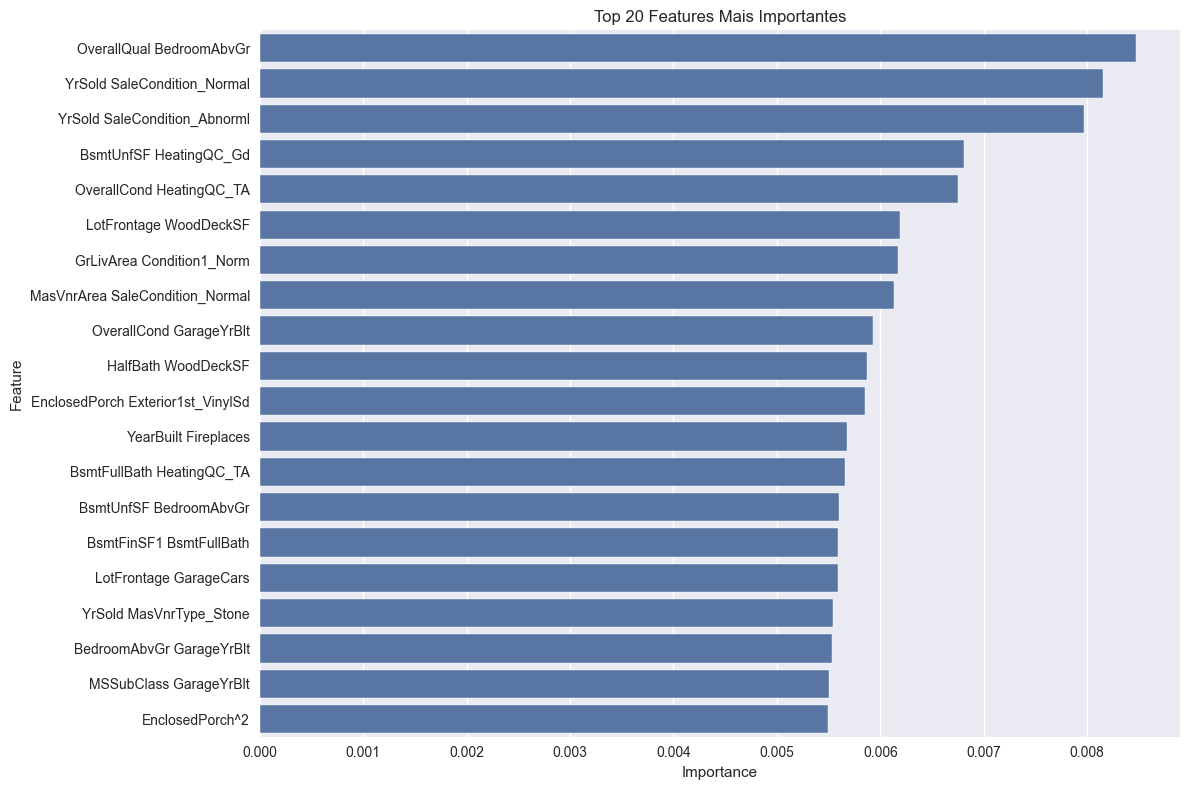

In [40]:
# Extrair os nomes das features após o pré-processamento
preprocessor = melhor_modelo.named_steps['preprocessor']
poly = melhor_modelo.named_steps['poly']
regressor = melhor_modelo.named_steps['regressor']

# Obter nomes das features categóricas após one-hot encoding
categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(colunas_categoricas)

# Juntar todos os nomes de features
feature_names = np.concatenate([
    colunas_numericas,
    categorical_features
])

# Aplicar transformação polinomial aos nomes das features
poly_feature_names = poly.get_feature_names_out(feature_names)

# Obter importância das features (coeficientes)
if hasattr(regressor, 'coef_'):
    importances = np.abs(regressor.coef_)
    # Se for um modelo com múltiplos alvos, calcular a média
    if len(importances.shape) > 1:
        importances = np.mean(importances, axis=0)
    
    # Criar DataFrame com as importâncias
    feature_importance = pd.DataFrame({
        'Feature': poly_feature_names,
        'Importance': importances
    })
    
    # Ordenar por importância
    feature_importance = feature_importance.sort_values('Importance', ascending=False).head(20)
    
    # Plotar as features mais importantes
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Top 20 Features Mais Importantes')
    plt.tight_layout()
    plt.show()

### 6. Submissão para o Kaggle

In [41]:
# Fazer previsões no conjunto de teste
X_test = test_df.drop(columns=['Id'])
y_pred_test = np.expm1(melhor_modelo.predict(X_test))  # Desfazer a transformação logarítmica

# Criar arquivo de submissão
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred_test
})

# Salvar arquivo de submissão
os.makedirs('../outputs', exist_ok=True)
submission_file = '../outputs/submission_polynomial_regression.csv'
submission.to_csv(submission_file, index=False)
print(f"Arquivo de submissão salvo em: {submission_file}")

# Exibir as primeiras linhas da submissão
print("\nPrimeiras linhas do arquivo de submissão:")
print(submission.head())

Arquivo de submissão salvo em: ../outputs/submission_polynomial_regression.csv

Primeiras linhas do arquivo de submissão:
     Id      SalePrice
0  1461  124743.790504
1  1462  160308.944087
2  1463  187961.023236
3  1464  197905.839828
4  1465  191634.393066
